# Plot how female locomotor variables change over time

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from disp import set_font_size, set_plot, set_color

cc = np.concatenate

DATA_FILE = 'data/simple/c_song_f_behav.csv'
NTR = 276
FPS = 30.03
DT = 1/FPS

In [7]:
df_all = pd.read_csv(DATA_FILE)
df_trs = [df_all[df_all['ID'] == ctr] for ctr in range(NTR)]
tr_lens = [len(df_tr) for df_tr in df_trs]

t = np.arange(np.max(tr_lens))*DT

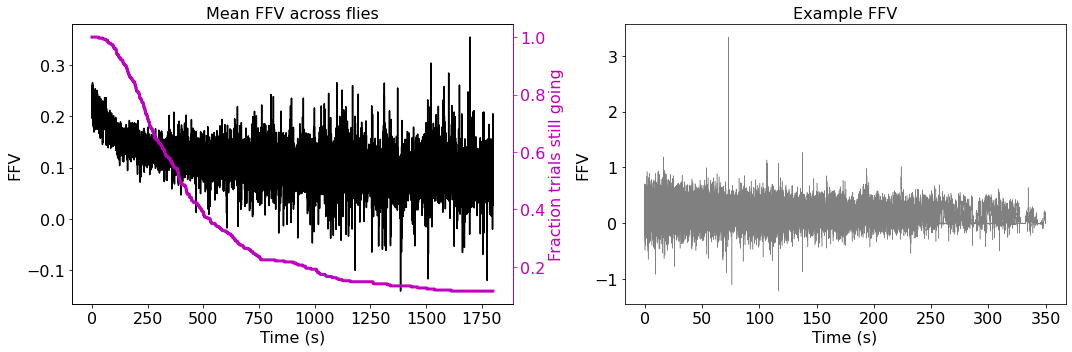

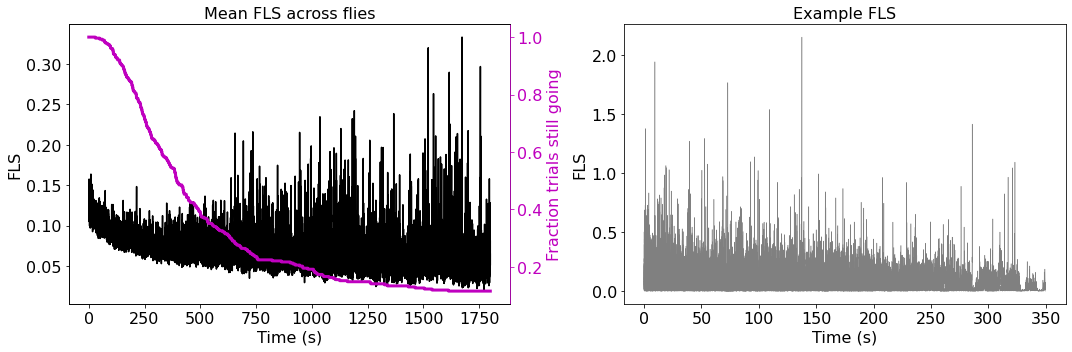

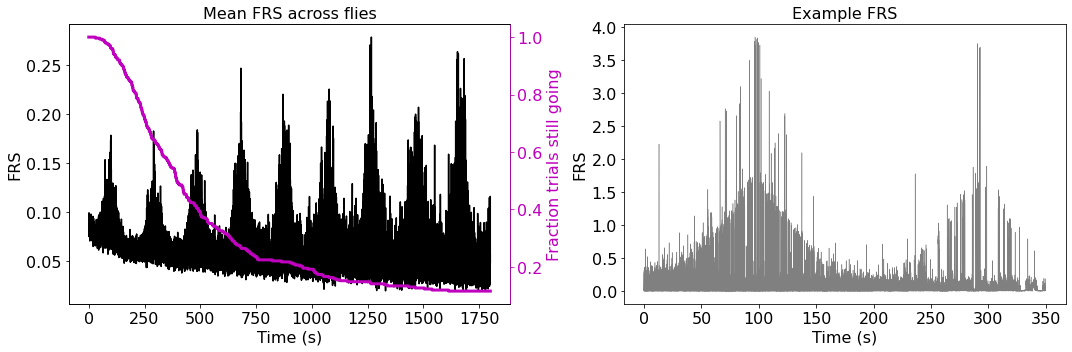

In [14]:
for kbehav in ['FFV', 'FLS', 'FRS']:
    vbehavs = [np.array(df_tr[kbehav]) for df_tr in df_trs]
        
    ys = np.nan * np.zeros((NTR, np.max(tr_lens)))
    for ctr, vbehav in enumerate(vbehavs):
        ys[ctr, :len(vbehav)] = vbehav
        
    fig, axs = plt.subplots(1, 2, figsize=(15, 5), tight_layout=True)
    axs[0].plot(t, np.nanmean(ys, axis=0), c='k')
    axs[0].set_title(f'Mean {kbehav} across flies')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel(kbehav)
    
    ax_0_twin = axs[0].twinx()
    ax_0_twin.plot(t, np.mean(~np.isnan(ys), axis=0), c='m', lw=3)
    ax_0_twin.set_ylabel('Fraction trials still going')
    
    for y in ys[30:40, :]:
        axs[1].plot(t, y, c='gray', lw=.5)
    axs[1].set_title(f'Example {kbehav}')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel(kbehav)
    
    set_font_size(axs, 16)
    set_font_size(ax_0_twin, 16)
    set_color(ax_0_twin, 'm')